In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

#### Hyper - parameters

In [49]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 10
learning_rate = 0.001

#### Data set

In [50]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                         train=False,
                                         transform=transforms.ToTensor())

#Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

In [51]:
example_data.shape
# ([100, 1, 28, 28])
example_data[0].shape
# ([1,28,28])
example_data[0][0].shape
# ([28,28])

torch.Size([28, 28])

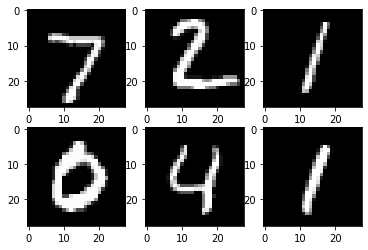

In [52]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

#### Model

In [53]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model =  NeuralNet(input_size, hidden_size, num_classes).to(device)

#### Loss and optimizer

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### train model

In [55]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin images shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/6000], Loss: 0.4423
Epoch [1/2], Step [200/6000], Loss: 0.5812
Epoch [1/2], Step [300/6000], Loss: 0.0958
Epoch [1/2], Step [400/6000], Loss: 0.2463
Epoch [1/2], Step [500/6000], Loss: 0.1786
Epoch [1/2], Step [600/6000], Loss: 0.1533
Epoch [1/2], Step [700/6000], Loss: 0.3328
Epoch [1/2], Step [800/6000], Loss: 0.3566
Epoch [1/2], Step [900/6000], Loss: 0.0698
Epoch [1/2], Step [1000/6000], Loss: 0.1058
Epoch [1/2], Step [1100/6000], Loss: 0.1613
Epoch [1/2], Step [1200/6000], Loss: 0.0643
Epoch [1/2], Step [1300/6000], Loss: 0.2306
Epoch [1/2], Step [1400/6000], Loss: 0.0387
Epoch [1/2], Step [1500/6000], Loss: 0.0442
Epoch [1/2], Step [1600/6000], Loss: 0.0486
Epoch [1/2], Step [1700/6000], Loss: 0.1556
Epoch [1/2], Step [1800/6000], Loss: 0.0165
Epoch [1/2], Step [1900/6000], Loss: 0.1021
Epoch [1/2], Step [2000/6000], Loss: 0.0387
Epoch [1/2], Step [2100/6000], Loss: 0.0557
Epoch [1/2], Step [2200/6000], Loss: 0.2059
Epoch [1/2], Step [2300/6000], Loss: 0.00

#### test model

In [56]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max returns (value, index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.83 %
